In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras #없을 시 !pip install keras 명령어 사용해서 설치
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.fliterings('ignore')

%matplotlib inline


OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [39]:
os.listdir("./titanic_data") #해당 파일에 어떤 파일이 들어 있는지 확인

['gender_submission.csv', 'test.csv', 'train.csv']

In [7]:
df_train = pd.read_csv('titanic_data/train.csv')
df_test = pd.read_csv('titanic_data/test.csv')
df_submission = pd.read_csv('titanic_data/gender_submission.csv')

In [19]:
df_train.shape,df_test.shape,df_submission.shape

((891, 12), (418, 11), (418, 2))

In [39]:
#df_train.columns
df_test.columns
#df_submission.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [69]:
df_train.head()
#df_test.head()
#df_submission.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
df_train.dtypes
#df_test.dtypes
#df_submission.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [31]:
df_train.describe()
#df_test.describe()
#df_submission.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
#df_train.isnull() #결측값 확인 / 결측값 - TRUE, 값이 있으면 - FLASE 
df_train.isnull().sum()

#열의 개수를 알고 싶으면 shape[1]
df_train.shape[0] #행의 총 개수
#df_train.isnull().sum() / df_train.shape[0] : 각 열에서 결측값의 개수를 구하고 / 행 수 = 결측값 비율 
#df_test.isnull().sum() / df_test.shape[0]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

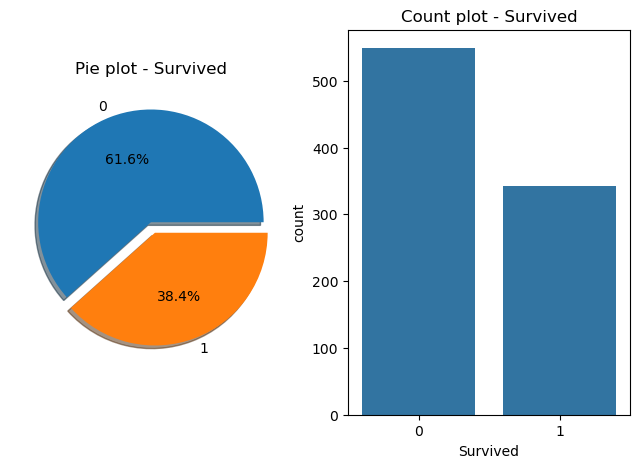

In [43]:
f,ax = plt.subplots(1,2, figsize=(8,5)) #1행 2열로 그래프 생성, 크기 설정
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [51]:
#df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()
#df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Pclass', ylabel='Survived'>

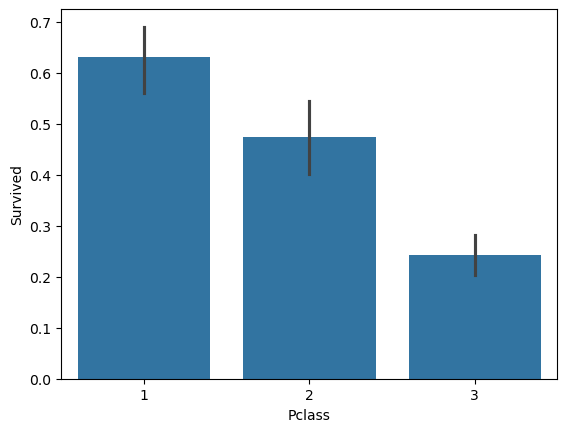

In [23]:
sns.barplot(x='Pclass', y='Survived', data=df_train)

In [49]:
pd.crosstab(df_train['Pclass'],df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

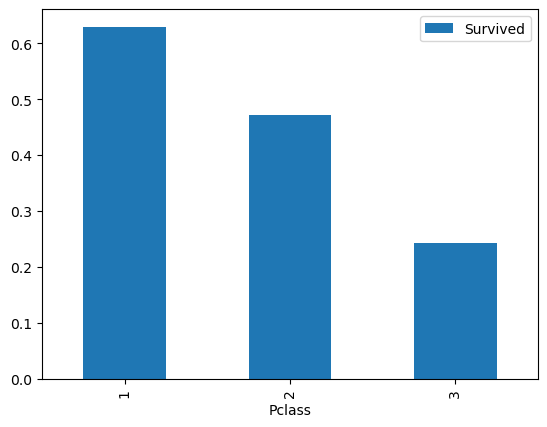

In [53]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

C:\Users\ghfkd\AppData\Local\Temp\ipykernel_22112\4282195129.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df_train, ci="sd")  # 표준 편차 기반 에러바


<Axes: xlabel='Pclass', ylabel='Survived'>

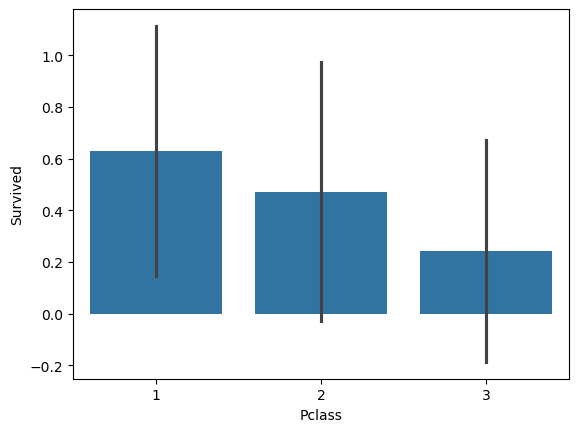

In [55]:
#ci="sd"
#ci는 *Confidence Interval(신뢰 구간)을 설정하는 옵션
#에러바를 표시할 때 표준 편차(Standard Deviation) 기준으로 계산함

sns.barplot(x="Pclass", y="Survived", data=df_train, ci="sd")  # 에러바 길이를 코드로 확인하기(표준 편차 기반 에러바)

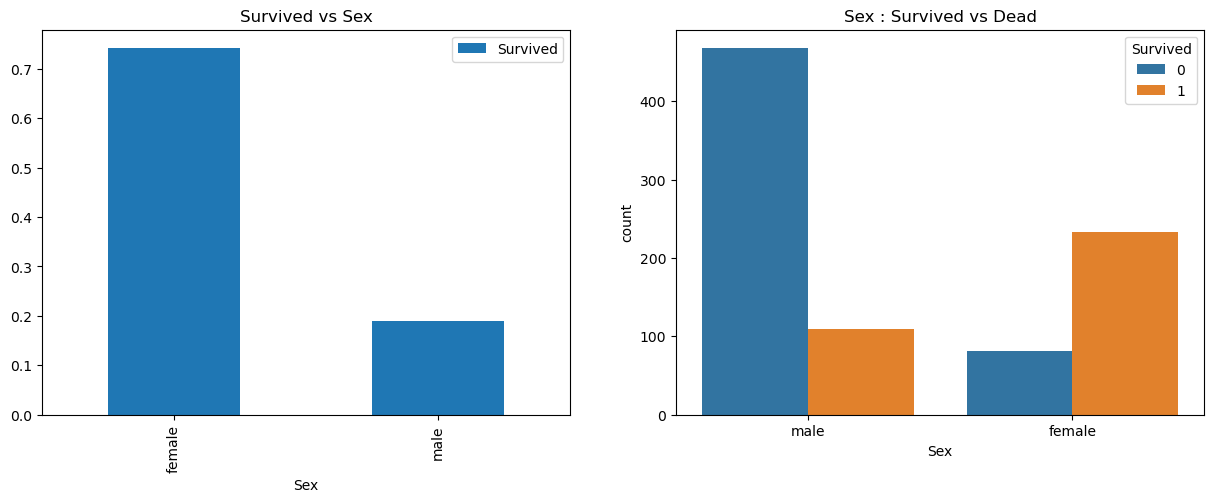

In [45]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

#성별(Sex)에 따른 생존 여부(Survived=0, 1)를 카운트하여 빈도수를 비교하는 그래프
#hue는 Survived의 기준으로 색상을 다르게 적용
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

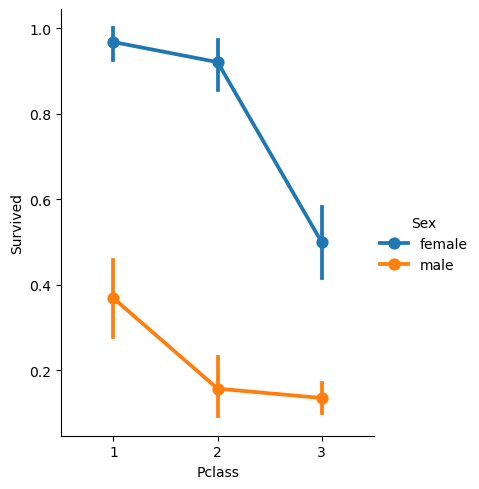

In [71]:
#kind는 그래프를 어떤 형태로 그릴지 지정하는 옵션
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=df_train,kind="point",aspect=0.8)

In [103]:
print('제일 나이가 많은 탑승객 : {:d}세'.format(int(df_train['Age'].max())))
print('제일 어린 탑승객 : {:d}세'.format(int(df_train['Age'].min())))
print('탑승객의 평균 나이 : {:.1f}세'.format(df_train['Age'].mean()))

제일 나이가 많은 탑승객 : 80세
제일 어린 탑승객 : 0세
탑승객의 평균 나이 : 29.7세


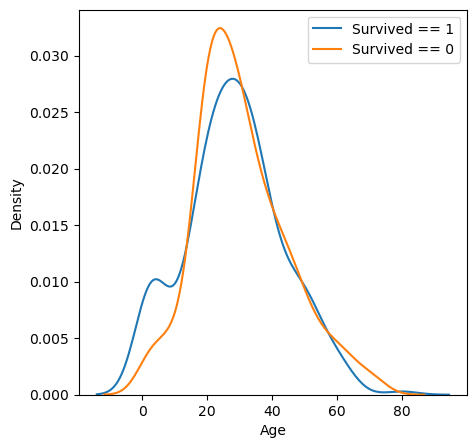

In [37]:
f,ax = plt.subplots(1,1, figsize=(5,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

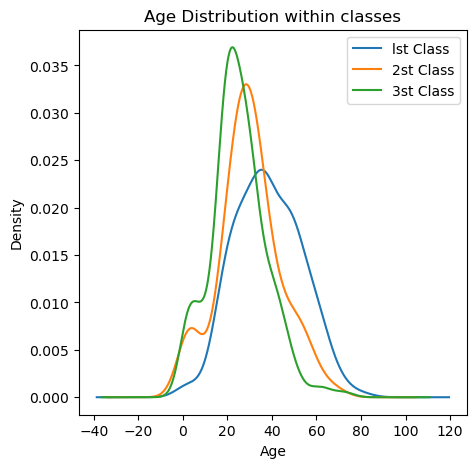

In [39]:
plt.figure(figsize=(5,5))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['lst Class','2st Class','3st Class'])

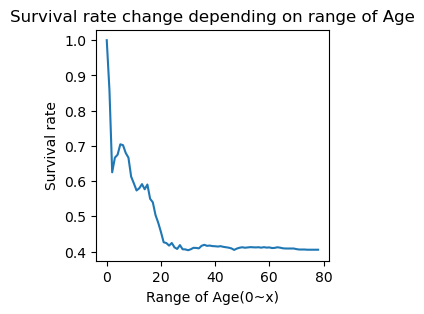

In [31]:
#생존률 = 생존자 수 / 전체 인원수
cummulate_survival_ratio = []
for i in range (1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(3,3))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age')
plt.xlabel('Range of Age(0~x)')
plt.ylabel('Survival rate')
plt.show()

In [47]:
print(df_train['Embarked'].unique())

['S' 'C' 'Q' nan]


<Axes: xlabel='Embarked'>

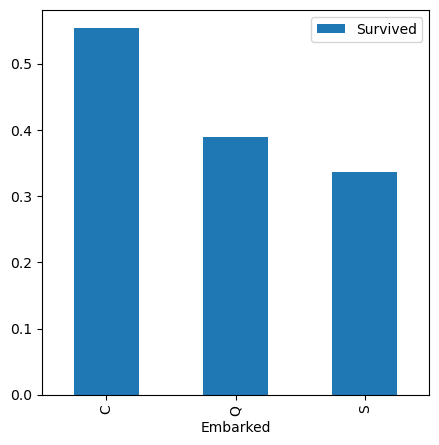

In [60]:
f,ax = plt.subplots(1,1,figsize=(5,5))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [64]:
#보류
print(df_train['Age'].isnull().sum())

177


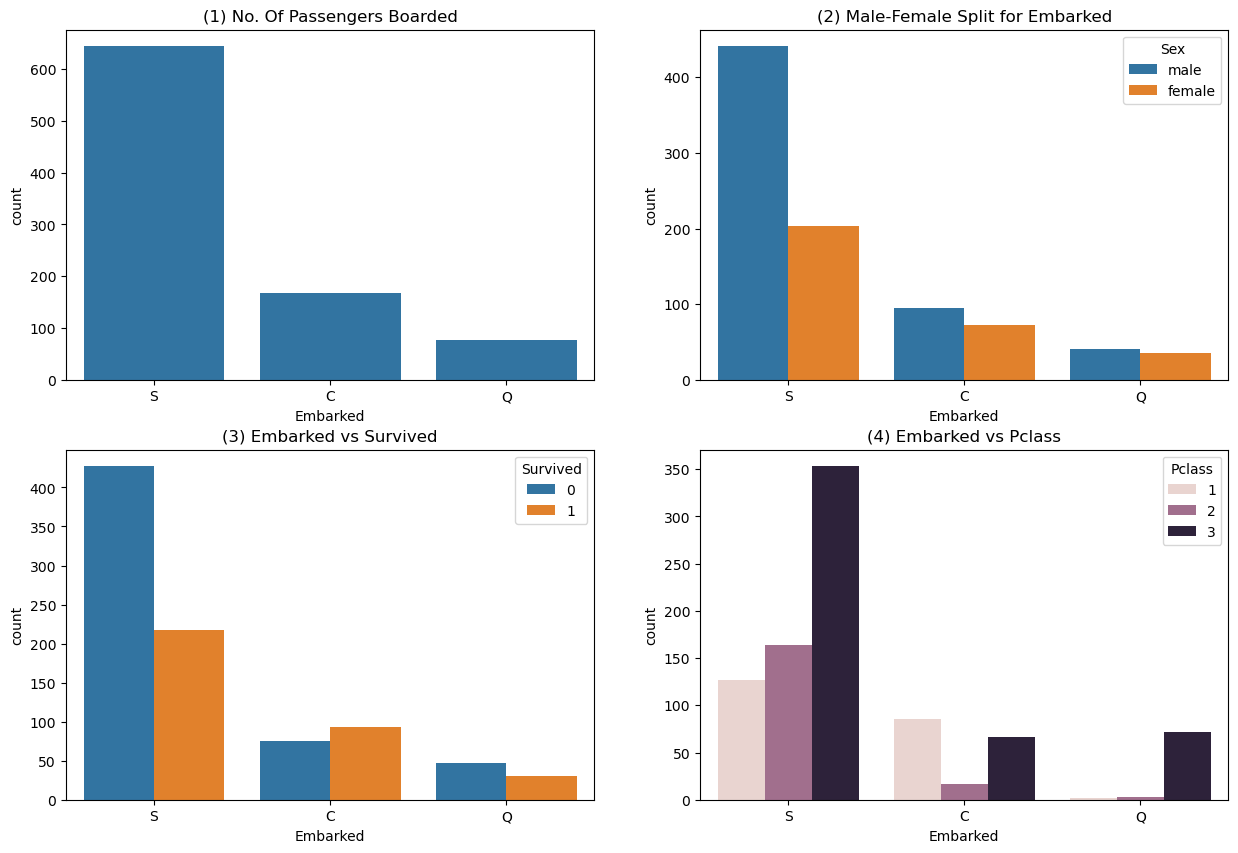

In [29]:
#(1):각 탑승 항구(C, Q, S)별로 얼마나 많은 승객이 탑승했을까?
#(2):각 항구에서 탑승한 승객 중 남성과 여성의 비율은 어떻게 될까?
#(3):각 항구에서 탑승한 승객들의 생존율은 얼마나 될까?
#(4):각 항구에서 탑승한 승객들의 등급(1, 2, 3등석) 분포는 어떨까?

f,ax=plt.subplots(2, 2, figsize=(15,10))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.2) # wspace-가로 간격/ hspace-세로 간격
plt.show()
    
#(1):'S'항구의 승객이 많이 탑승한 것을 볼 수 있다
#(2):전반적으로 남성 승객이 더 많고, 'C','Q'항구의 여성 승객 비율이 높다
#(3):'S'항구의 사망률이 높고 'C'항구의 생존률이 높다는걸 볼 수 있다
#(4):'S'항구의 3등석 비율이 높고 'C'항구의 1등석 비율이 높다

In [51]:
#위 차트보고 추가 작업
embarked_counts = df_train['Embarked'].value_counts()
print("항구별 승객 수 : ",embarked_counts)

embarked_fare = df_train.groupby('Embarke2d')['Fare'].mean().round(1).astype(str) + "원"
print("항구별 평균 요금 : ",embarked_fare)

항구별 승객 수 :  Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
항구별 평균 요금 :  Embarked
C    60.0원
Q    13.3원
S    27.1원
Name: Fare, dtype: object
